In [1]:
import pandas as pd
import duckdb as db
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_city=pd.read_csv("/content/drive/MyDrive/Data analyst/projet_data_post_formation/data_city.csv")

In [3]:
data_state = data_city[(data_city['Region']=='West') & (data_city['City'].isnull())]
data_state

,annee,City,State,Region,CA,part_pct,prog,Marge,prog_marge,marge_pct,diff_mag,prog_mag
33,2014,NaN,Arizona,West,8295.24,2.80,NaN,-903.20,NaN,-10.89,NaN,NaN
36,2015,NaN,Arizona,West,9611.21,3.43,15.86,236.38,-126.17,2.46,1.0,11.11
51,2016,NaN,Arizona,West,6242.02,1.66,-35.05,-1485.11,-728.27,-23.79,-2.0,-20.00
59,2017,NaN,Arizona,West,11133.54,2.23,78.36,-1276.00,-14.08,-11.46,2.0,25.00
110,2014,NaN,California,West,91303.53,30.87,NaN,12637.95,NaN,13.84,NaN,NaN
160,2015,NaN,California,West,88443.84,31.59,-3.13,14371.26,13.72,16.25,4.0,12.12
205,2016,NaN,California,West,131551.91,35.08,48.74,20005.72,39.21,15.21,10.0,27.03
223,2017,NaN,California,West,146388.34,29.26,11.28,29366.46,46.79,20.06,9.0,19.15
271,2014,NaN,Colorado,West,6502.29,2.20,NaN,438.19,NaN,6.74,NaN,NaN
273,2015,NaN,Colorado,West,4639.27,1.66,-28.65,-1141.07,-360.41,-24.60,0.0,0.00


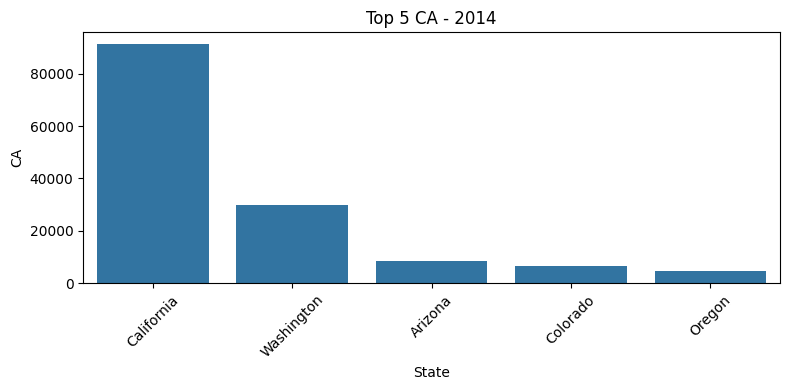

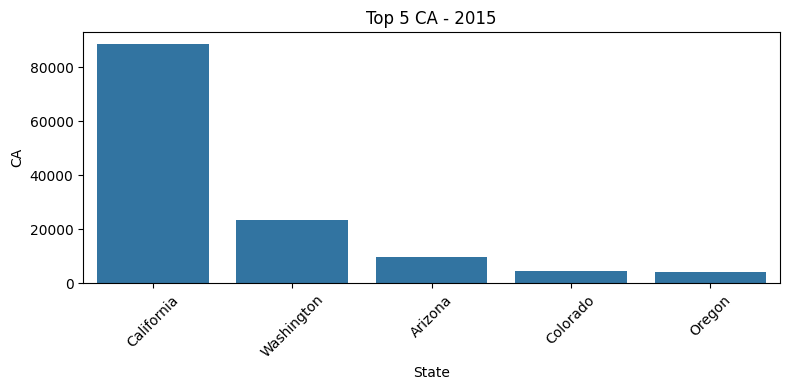

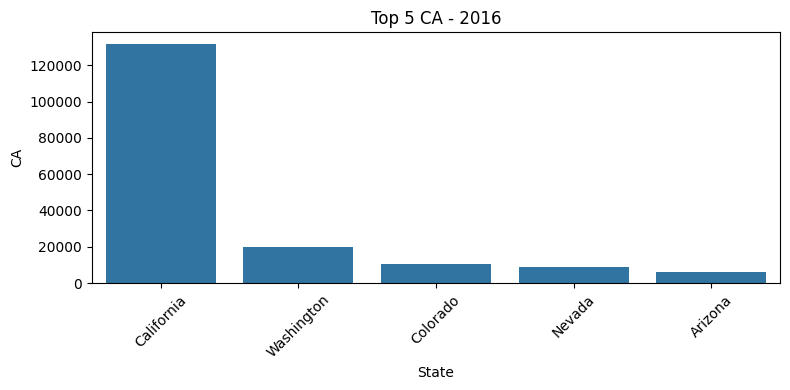

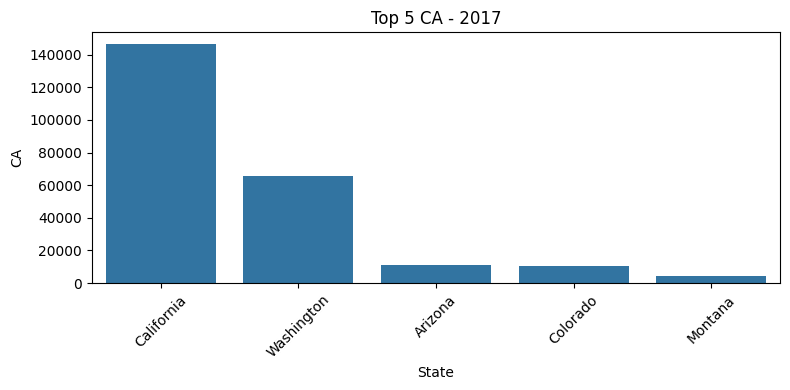

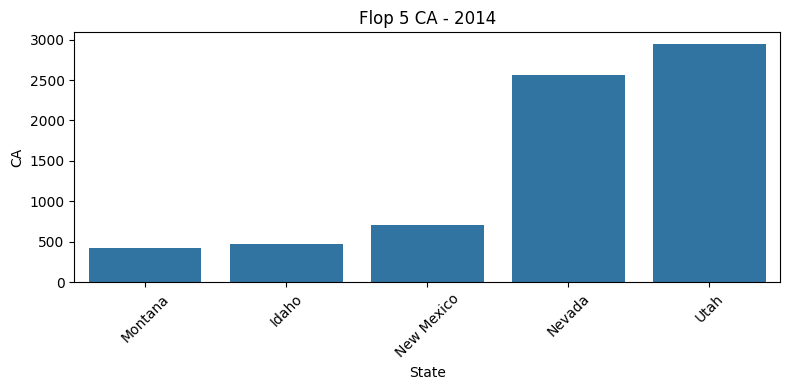

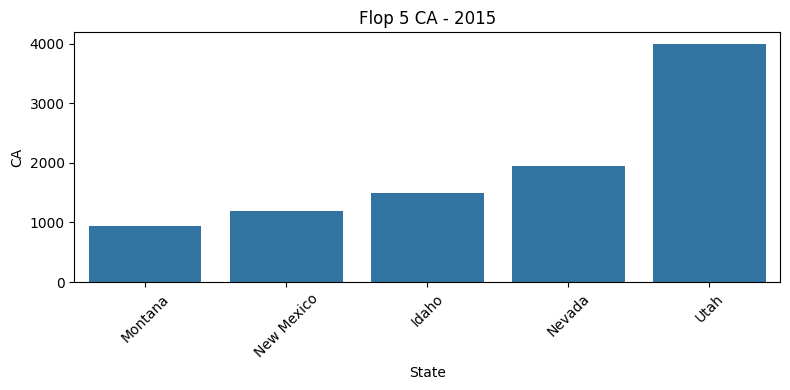

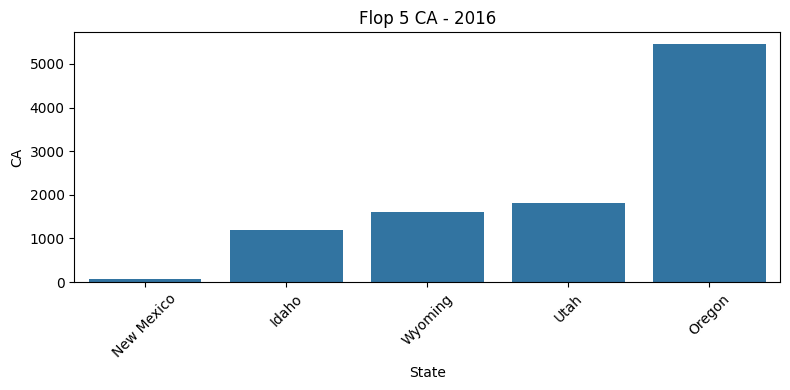

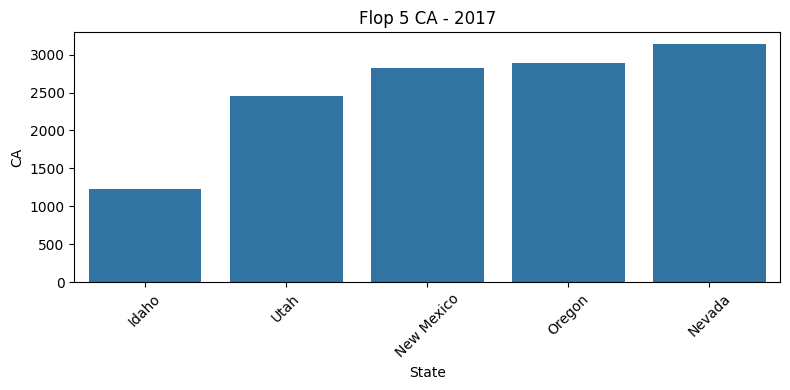

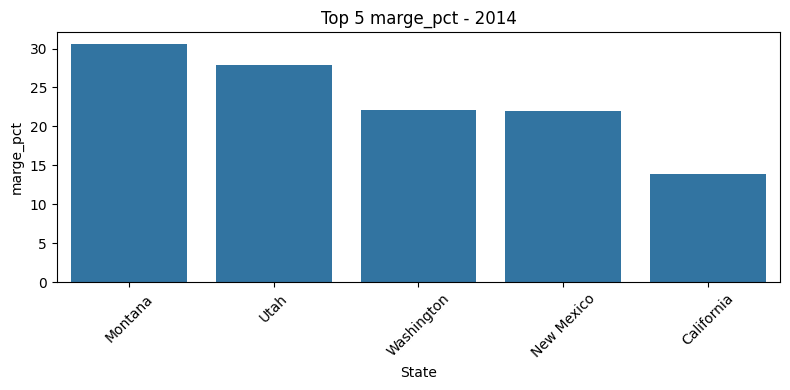

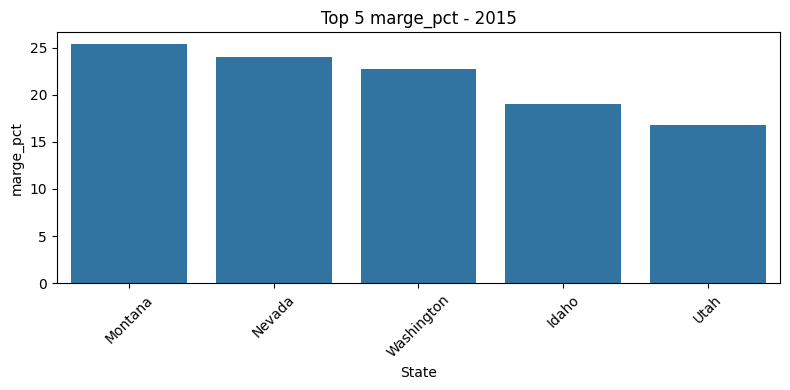

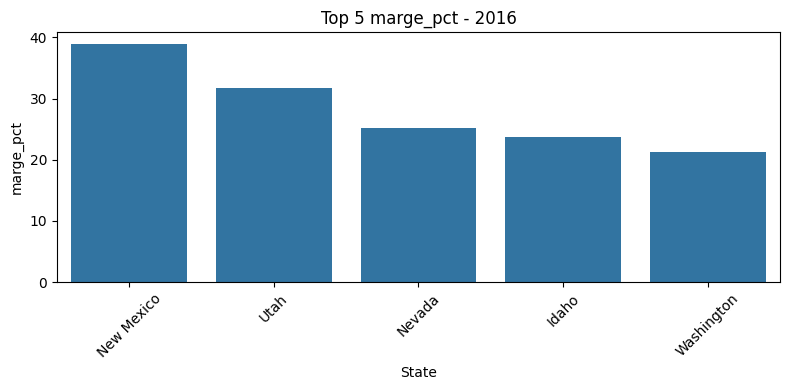

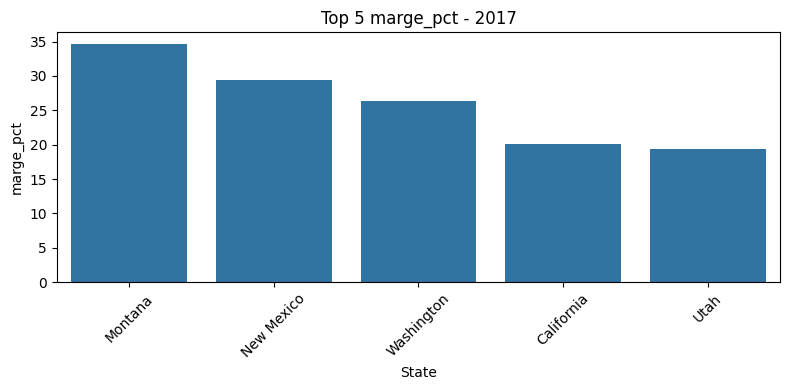

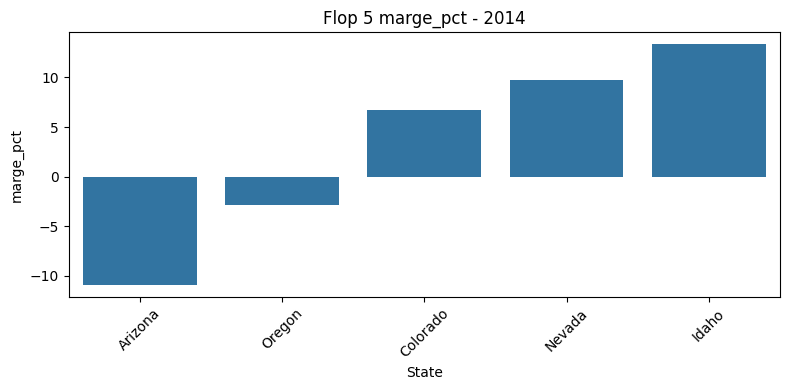

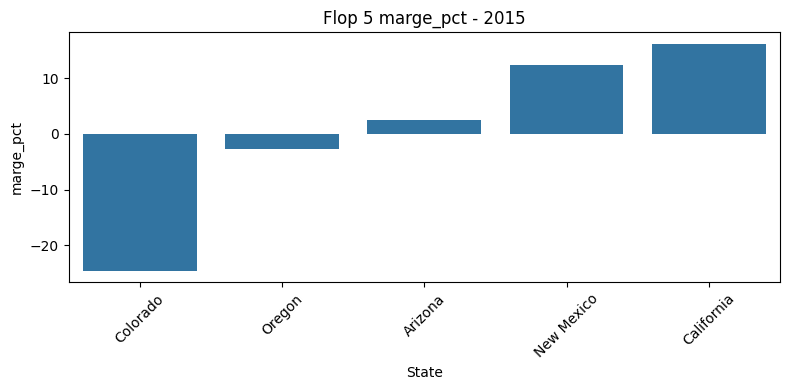

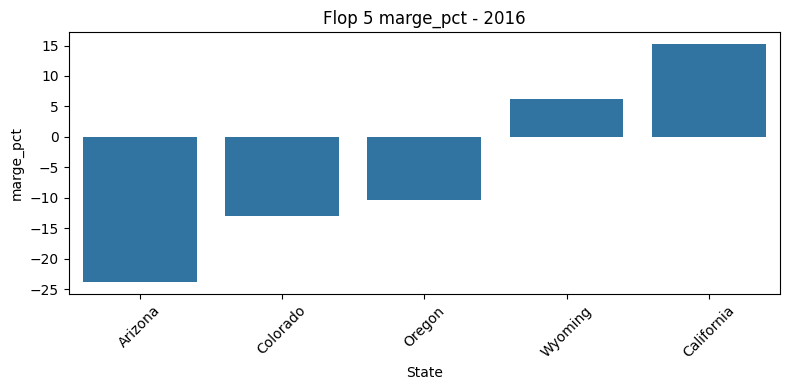

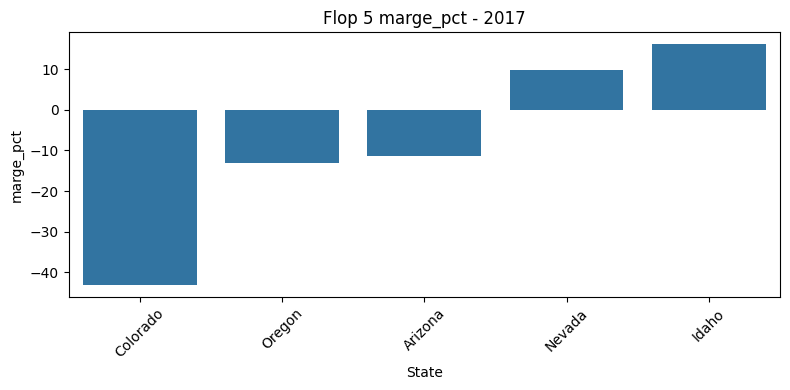

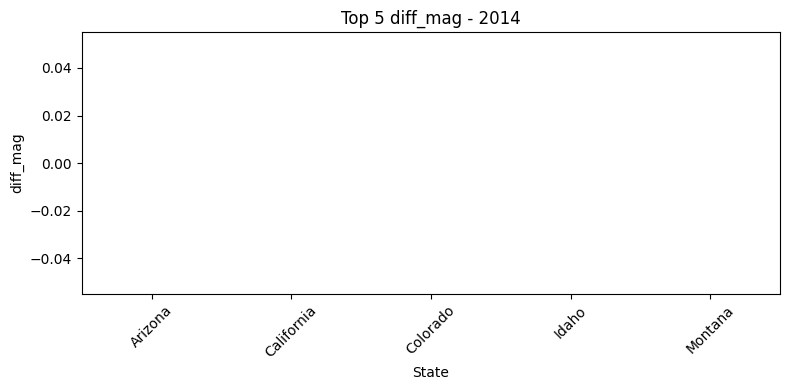

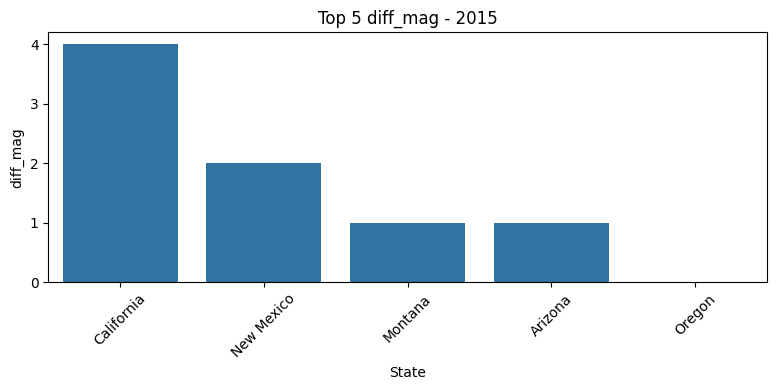

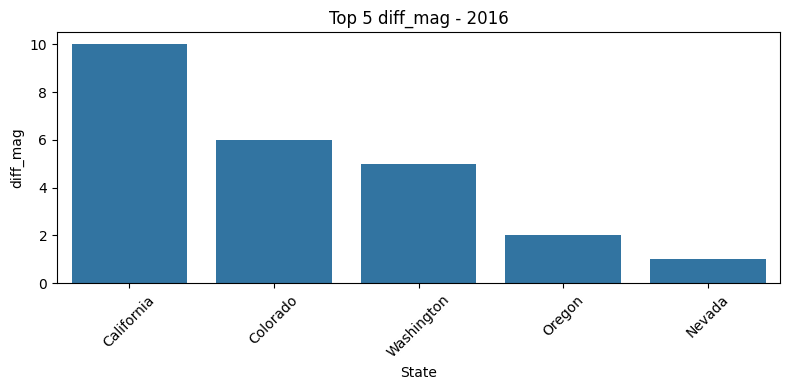

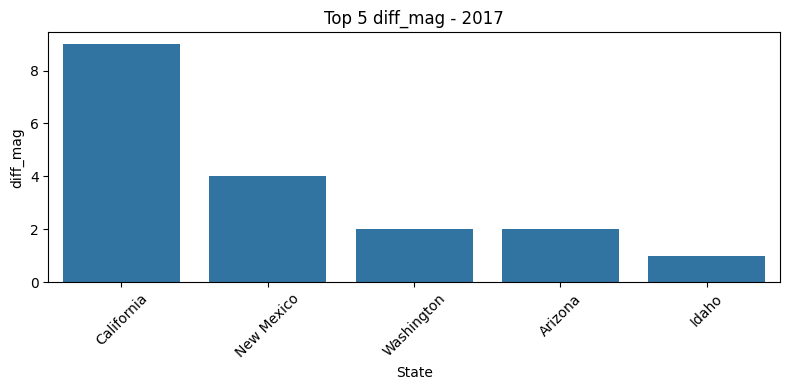

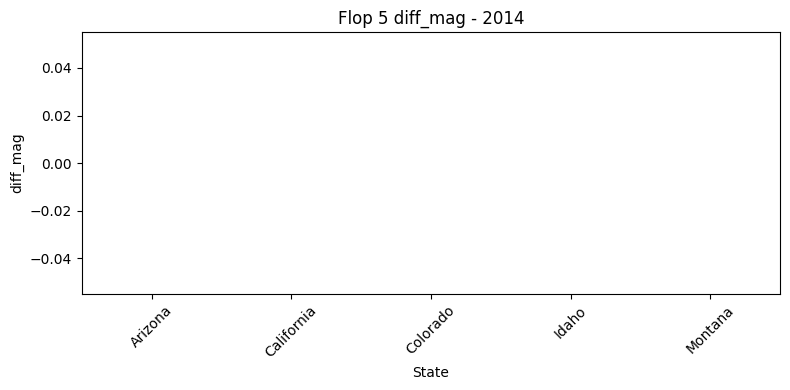

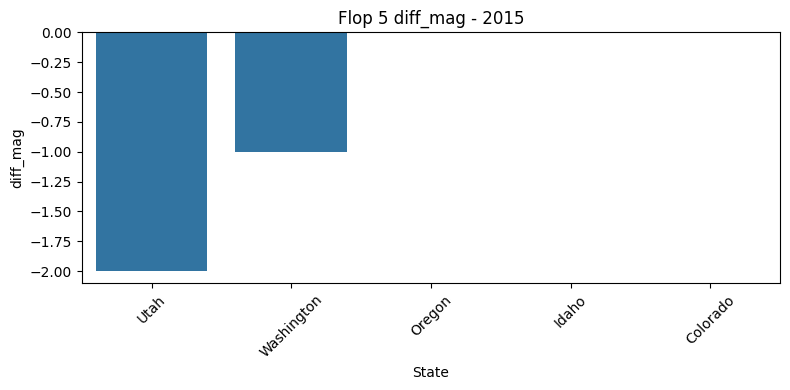

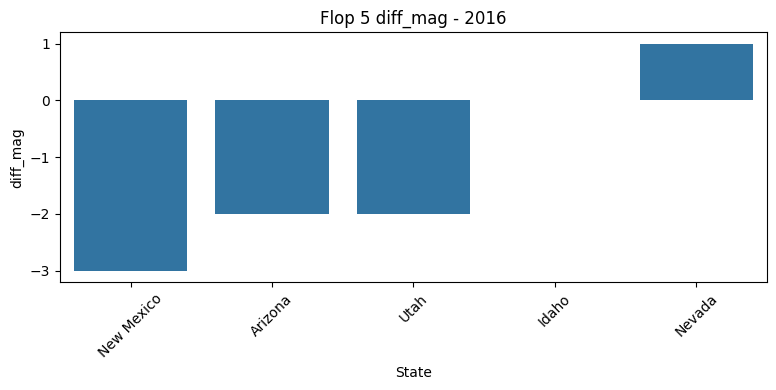

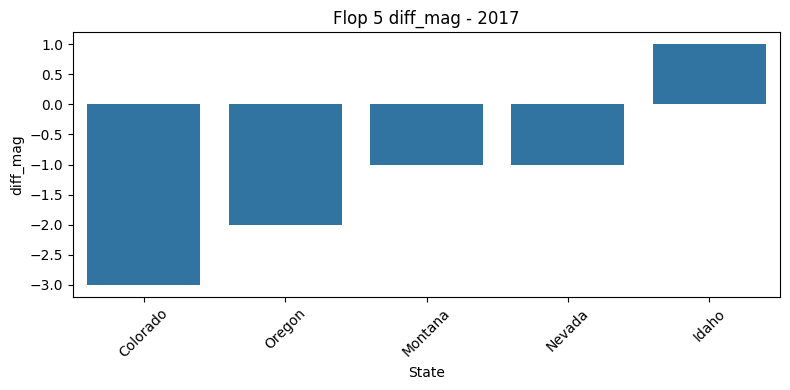

In [4]:
def Top_Flop(df: pd.DataFrame, col: str, n: int = 5, ascending: bool = False) -> pd.DataFrame:
    data_sub=(
        df.sort_values(by=col, ascending=ascending)
        .groupby('annee')
        .head(n)

    )
    years = sorted(data_sub["annee"].unique())
    for year in years:
        plt.figure(figsize=(8,4))
        subset = data_sub[data_sub["annee"] == year]
        sns.barplot(data=subset, x="State", y=col)
        plt.title(f"{'Top' if not ascending else 'Flop'} {n} {col} - {year}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    return data_sub


top5 = Top_Flop(data_state, "CA", ascending=False)
flop5 =Top_Flop(data_state, "CA", ascending=True)

top5 = Top_Flop(data_state, "marge_pct", ascending=False)
flop5 =Top_Flop(data_state, "marge_pct", ascending=True)

top5 = Top_Flop(data_state, "diff_mag", ascending=False)
flop5 =Top_Flop(data_state, "diff_mag", ascending=True)



📊 Compte-rendu – Région West (2014–2017)
1. Contribution et rôle stratégique

La région West est le moteur national : elle représente ~1/3 du chiffre d’affaires total.

Sa part progresse fortement en 2017 (26% rien que pour l’État de Washington + 20% pour la Californie) → ces deux États dominent la zone.

2. Performance du chiffre d’affaires

Croissance solide sur la période, portée par Californie et Washington :

Californie : leader historique, >50% du CA régional. Après une petite baisse en 2015, elle repart fortement en 2016–2017.

Washington : explosion en 2017 (x3 en CA par rapport à 2016). C’est clairement le relais de croissance récent.

Les autres États pèsent peu individuellement (<5% chacun), avec des trajectoires irrégulières (Nevada, Colorado, Oregon en baisse nette en 2017).

3. Performance de la marge

Tendance globale positive : la marge croît avec le CA, surtout en 2017.

Mais fortes disparités :

Californie : marge élevée et en progression continue (20% en 2017 → record).

Washington : marge solide (26% en 2017), ce qui conforte son rôle de relais stratégique.

États secondaires : marges volatiles, parfois négatives (Arizona, Oregon, Colorado). Ce sont de vrais points faibles → risque d’érosion de rentabilité si on y investit sans stratégie claire.

Nouveau Mexique et Montana : petits volumes mais marges surprenamment hautes en 2016–2017 → niches potentiellement intéressantes.

4. Points forts

✅ Une base solide en Californie (volume + marge).
✅ Relais de croissance puissant en Washington avec CA + marge en forte hausse.
✅ Quelques poches de rentabilité inattendues (Nouveau Mexique, Montana).

5. Points faibles / risques

⚠️ Concentration du CA sur deux États (CA + WA) → risque fort de dépendance.
⚠️ Plusieurs États du West restent instables ou destructeurs de marge (Arizona, Oregon, Colorado).
⚠️ La progression de certains petits États est spectaculaire en % mais sur des volumes faibles → effet “illusion de croissance”.

6. Synthèse pour un directeur

La région West est indispensable pour la croissance nationale.
Mais elle est déséquilibrée : tout repose sur deux piliers (Californie + Washington).
La marge suit la même logique : très rentable sur ces deux États, beaucoup plus fragile ailleurs.

👉 Conclusion business :

Protéger la Californie, moteur historique, et continuer à capitaliser sur sa marge élevée.

Consolider Washington comme nouveau pilier, en sécurisant ce boom (quelles catégories, quels clients expliquent cette croissance ?).

Décider du rôle des petits États : soit on les traite comme relais secondaires (et on investit), soit on accepte qu’ils restent marginaux, mais il faut éviter qu’ils grignotent la rentabilité globale.


Parfait 👍 tu as maintenant le détail de tous les **États de la région West** (2014 → 2017) avec **CA, marge et ouvertures de magasins**. Voici une **analyse complète et structurée** que tu pourrais livrer à ton directeur :

---

## 🔎 Compte rendu – Région West (États)

### 1. États moteurs (forte contribution et croissance)

* **California**

  * Reste **le cœur du business** (≈ 60 % du CA West).
  * Croissance continue du CA (+60 % entre 2014 et 2017).
  * Marge en nette progression (de 13,8 % à 20 %).
  * Forte dynamique d’ouvertures (+9 sur la période).
    👉 **Priorité absolue** : continuer à consolider l’ancrage, surveiller la saturation.

* **Washington**

  * Gros bond en 2017 (+230 % CA, +310 % marge) après plusieurs années de recul.
  * Poids porté à 26 % du CA West.
  * Marges solides (22 → 26 %).
    👉 **État stratégique en croissance** : comprendre le rebond 2017 pour le reproduire.

---

### 2. États intermédiaires (poids moyen mais instables)

* **Arizona**

  * Volatilité extrême : -35 % CA en 2016, puis +78 % en 2017.
  * Marge toujours négative (≈ -10 à -24 %).
    👉 Risque structurel : à surveiller, sinon rationaliser.

* **Colorado**

  * Forte progression en 2016 (+130 % CA) mais rechute en 2017 (-3 %).
  * Marge catastrophique : -24 % → -43 %.
    👉 Beaucoup d’efforts pour peu de rentabilité.

* **Nevada**

  * Pic en 2016 (x4 le CA, marge 25 %) mais effondrement total en 2017 (-65 % CA).
    👉 Opportunité mais très instable : il faut clarifier le modèle.

* **Oregon**

  * CA en recul (-47 % entre 2016 et 2017).
  * Marge durablement négative (-2 à -13 %).
    👉 État déficitaire, peut-être à désinvestir.

---

### 3. Petits États mais dynamiques

* **Montana**

  * Croissance explosive : +352 % CA en 2017.
  * Très forte marge (35 %).
    👉 Petit volume, mais **rendement exceptionnel** → à pousser.

* **New Mexico**

  * Catastrophe en 2016 (quasi zéro CA), mais rebond spectaculaire en 2017 (+4 300 % CA).
  * Marge remontée à 29 %.
    👉 Exemple de **potentiel caché**, mais très volatil.

* **Idaho**

  * Progression modérée mais marge correcte (16 % en 2017).
    👉 Bon relais de croissance secondaire.

* **Utah**

  * Très instable : +35 % CA en 2015, -54 % en 2016, +35 % en 2017.
  * Marge en recul (27 % → 19 %).
    👉 Potentiel présent mais fragile.

* **Wyoming**

  * Très petit marché (CA < 2 000).
  * Marge faible (6 %).
    👉 Non prioritaire.

---

## ✅ Synthèse stratégique West

* **Forces** : California (base stable, croissance + marge), Washington (rebond spectaculaire).
* **Faiblesses** : Colorado et Oregon (fortes pertes malgré volume), Arizona (marge négative chronique).
* **Opportunités** : Montana et New Mexico (très rentables, même si petits marchés).
* **Menaces** : forte instabilité dans Nevada et Utah → attention aux ouvertures non rentables.

---

## 🎯 Recommandations

1. **Consolider California + Washington** = socle solide du West.
2. **Sélectionner des relais** : Montana, New Mexico, Idaho.
3. **Assainir ou réduire l’exposition** à Colorado, Oregon, Arizona (forte destruction de marge).
4. **Revoir le modèle Nevada/Utah** : comprendre pourquoi les pics ne se maintiennent pas.



In [5]:
data_region = data_city[(data_city['Region']=='West')]
data_region

,annee,City,State,Region,CA,part_pct,prog,Marge,prog_marge,marge_pct,diff_mag,prog_mag
26,2014,Scottsdale,Arizona,West,402.07,0.14,NaN,-279.20,NaN,-69.44,NaN,NaN
27,2014,Tempe,Arizona,West,677.54,0.23,NaN,139.72,NaN,20.62,NaN,NaN
28,2014,Avondale,Arizona,West,892.57,0.30,NaN,70.50,NaN,7.90,NaN,NaN
29,2014,Glendale,Arizona,West,331.75,0.11,NaN,27.61,NaN,8.32,NaN,NaN
30,2014,Gilbert,Arizona,West,1280.99,0.43,NaN,174.29,NaN,13.61,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1545,2017,Pasco,Washington,West,429.59,0.09,-75.75,122.30,-48.01,28.47,0.0,0.0
1546,2017,Bellingham,Washington,West,3790.24,0.76,NaN,610.59,NaN,16.11,NaN,NaN
1547,2017,Edmonds,Washington,West,650.71,0.13,101.33,106.41,-28.27,16.35,0.0,0.0
1582,2016,Cheyenne,Wyoming,West,1603.14,0.43,NaN,100.20,NaN,6.25,NaN,NaN


In [21]:
q="""
SELECT
  distinct(State),
  CA
FROM data_region
WHERE city is null AND annee=2017
QUALIFY DENSE_RANK() OVER (ORDER BY CA DESC) = 1


"""

data_city=db.sql(q).df()

In [35]:
state= data_city["State"].iloc[0]
data_city = (
    data_region
    .query("City.notnull()")
    .query("State==@state")
    .sort_values(by="annee")
)

data_city
pd.set_option("display.max_rows", None)   # affiche toutes les lignes
pd.set_option("display.max_columns", None) # affiche toutes les colonnes
pd.set_option("display.width", None)      # évite les coupures
pd.set_option("display.max_colwidth", None)
data_city


,annee,City,State,Region,CA,part_pct,prog,Marge,prog_marge,marge_pct,diff_mag,prog_mag
89,2014,Long Beach,California,West,10.10,0.00,NaN,4.37,NaN,43.27,NaN,NaN
90,2014,Pasadena,California,West,465.49,0.16,NaN,-56.74,NaN,-12.19,NaN,NaN
91,2014,Lodi,California,West,39.68,0.01,NaN,16.27,NaN,41.00,NaN,NaN
92,2014,Roseville,California,West,7.98,0.00,NaN,2.07,NaN,25.94,NaN,NaN
93,2014,Redding,California,West,333.58,0.11,NaN,25.02,NaN,7.50,NaN,NaN
94,2014,Mission Viejo,California,West,290.67,0.10,NaN,3.42,NaN,1.18,NaN,NaN
95,2014,Riverside,California,West,602.43,0.20,NaN,185.39,NaN,30.77,NaN,NaN
96,2014,San Francisco,California,West,30983.51,10.48,NaN,4293.07,NaN,13.86,NaN,NaN
97,2014,Los Angeles,California,West,28882.70,9.77,NaN,4096.55,NaN,14.18,NaN,NaN
98,2014,San Jose,California,West,2067.81,0.70,NaN,260.25,NaN,12.59,NaN,NaN


In [32]:
data_city[data_city['City']=='Long Beach']

,annee,City,State,Region,CA,part_pct,prog,Marge,prog_marge,marge_pct,diff_mag,prog_mag
89,2014,Long Beach,California,West,10.10,0.00,NaN,4.37,NaN,43.27,NaN,NaN
130,2015,Long Beach,California,West,1021.45,0.36,10013.37,133.86,2963.16,13.10,0.0,0.0
166,2016,Long Beach,California,West,1139.37,0.30,11.54,287.67,114.90,25.25,0.0,0.0
210,2017,Long Beach,California,West,2762.92,0.55,142.50,320.49,11.41,11.60,0.0,0.0


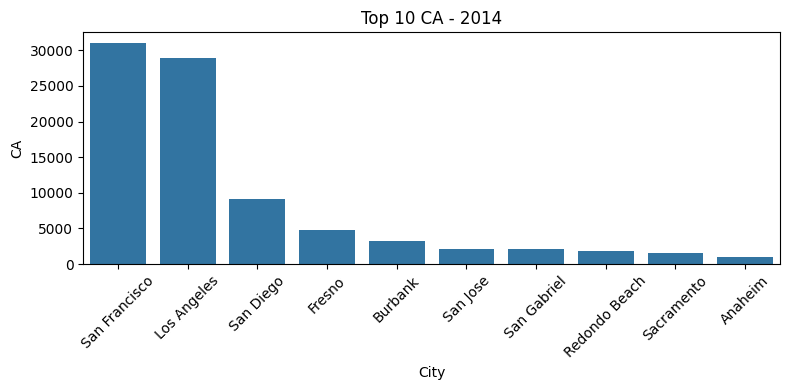

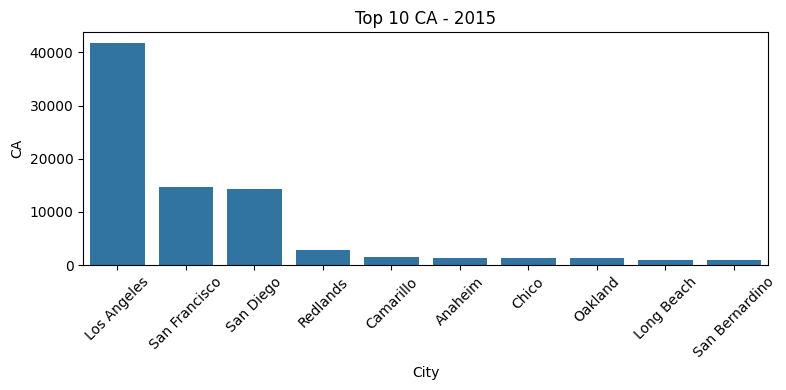

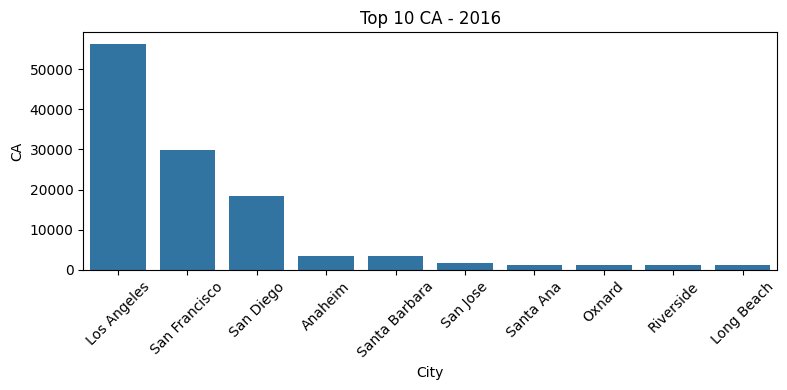

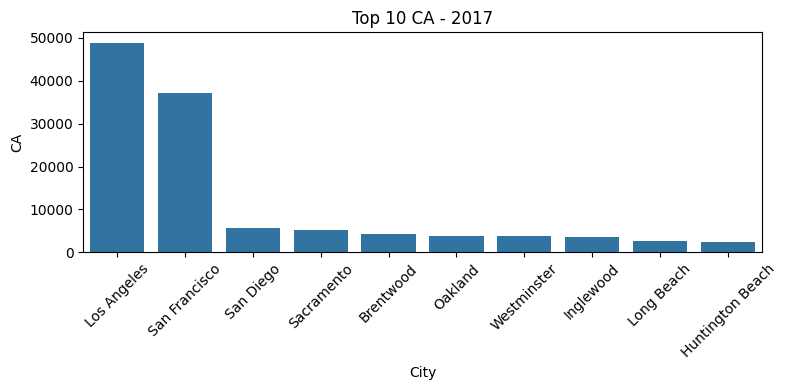

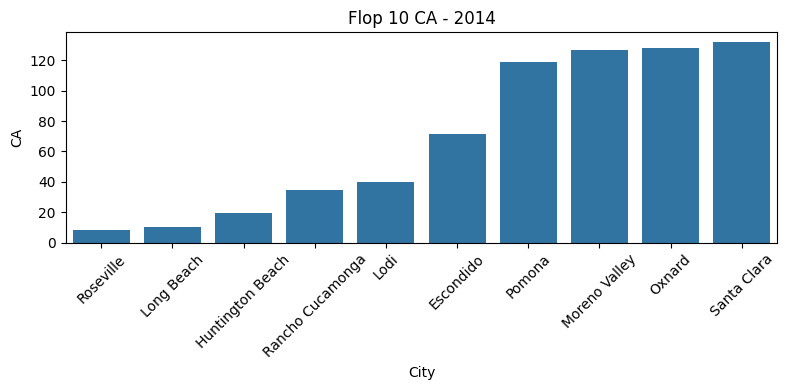

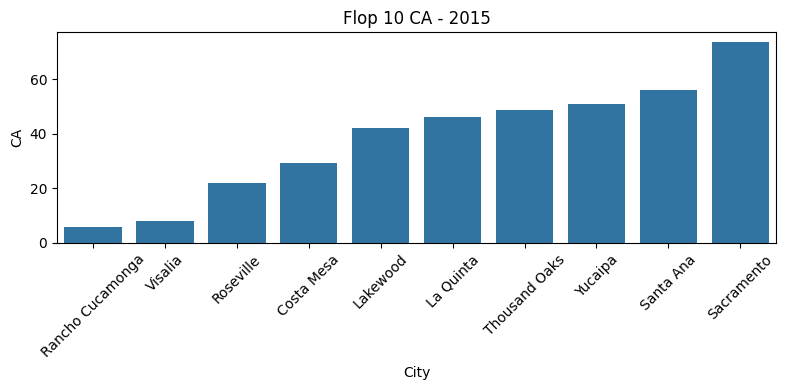

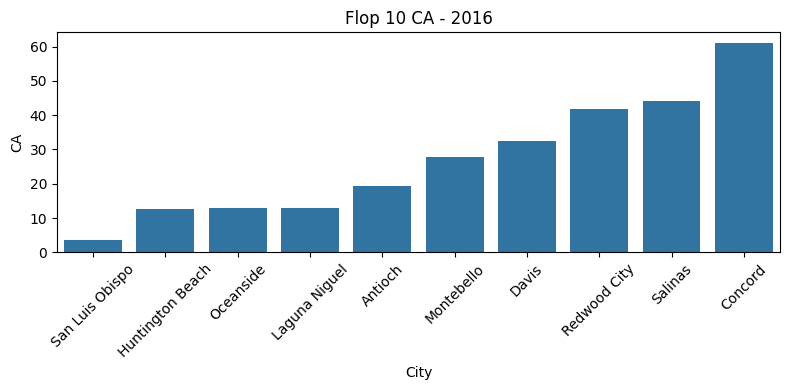

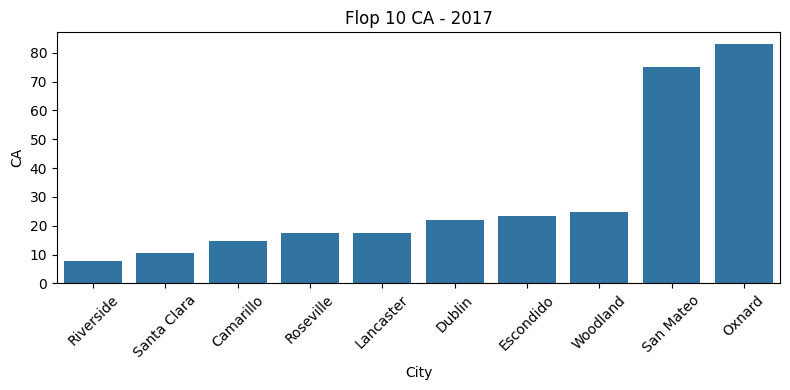

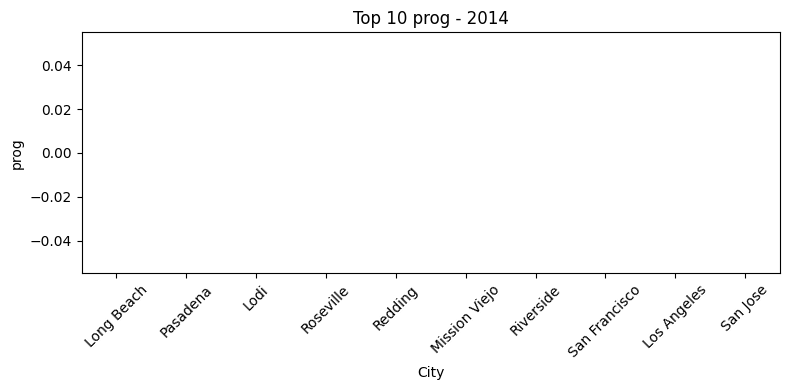

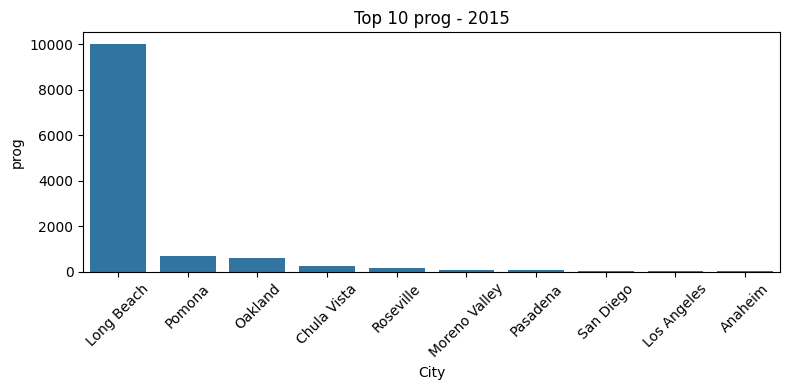

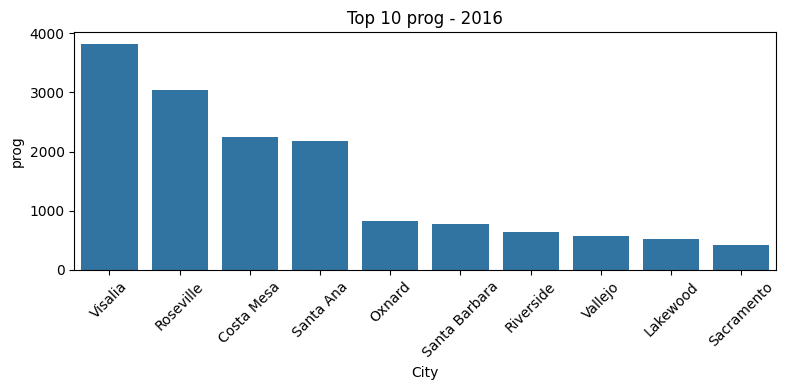

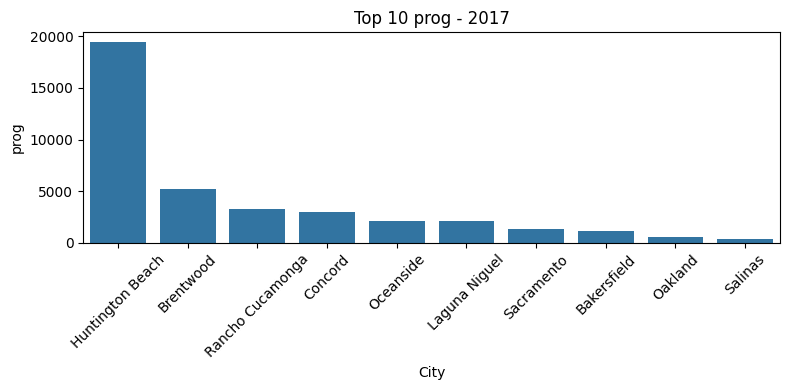

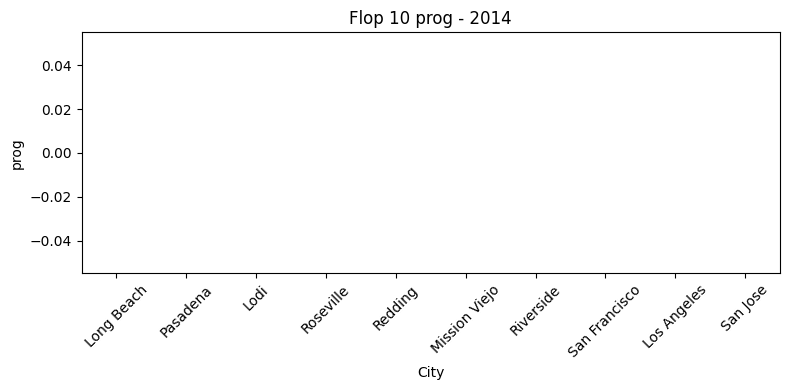

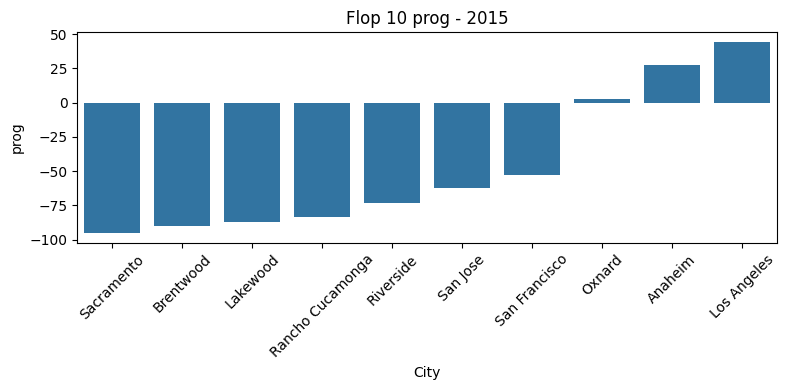

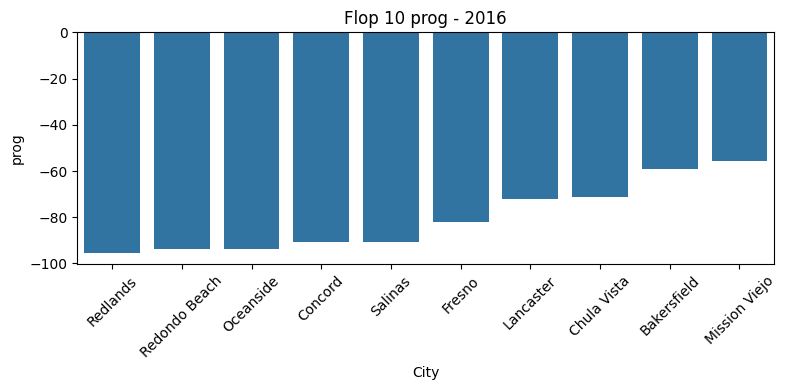

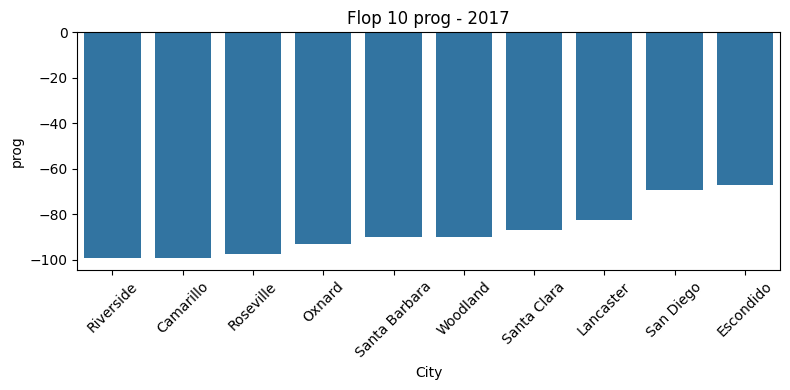

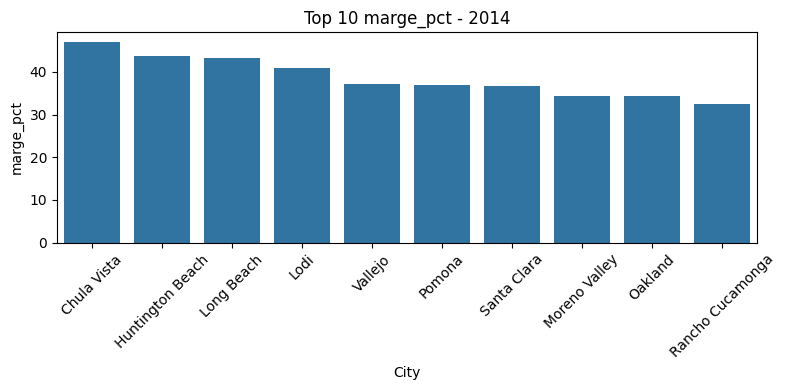

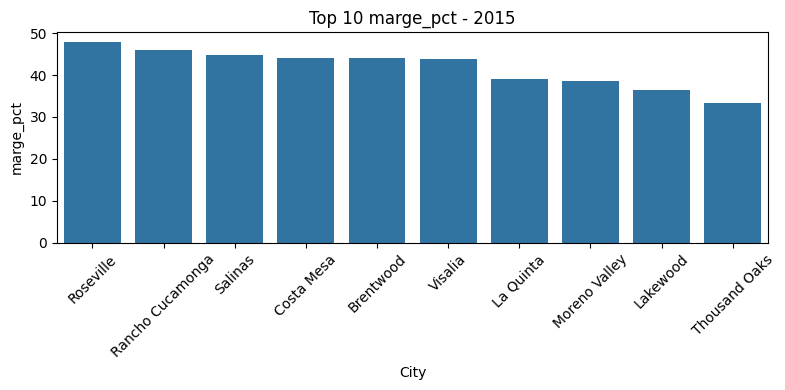

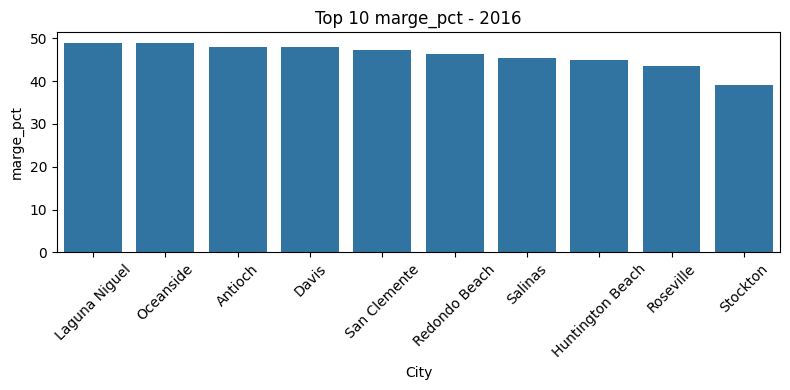

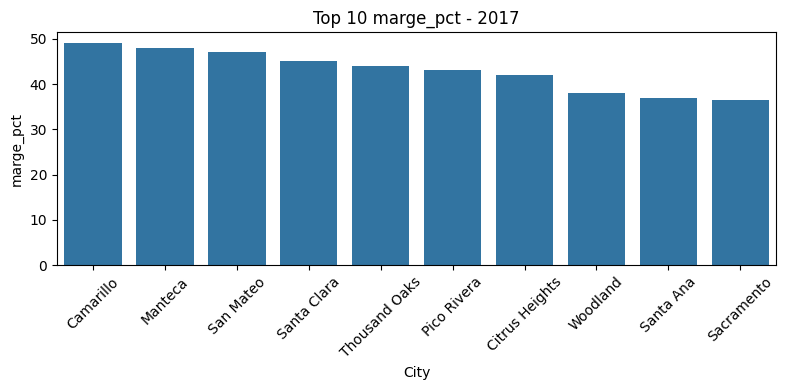

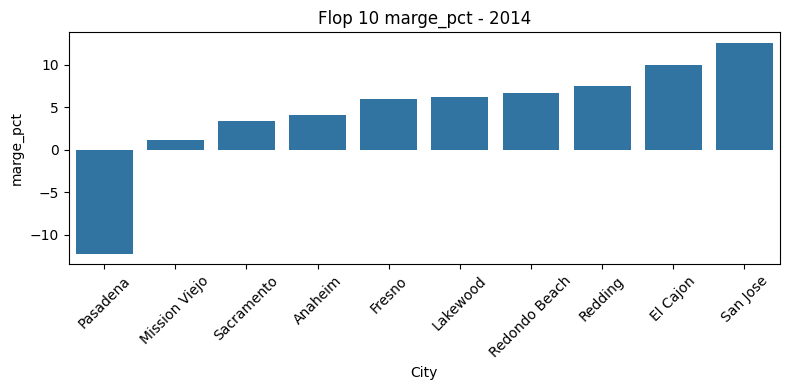

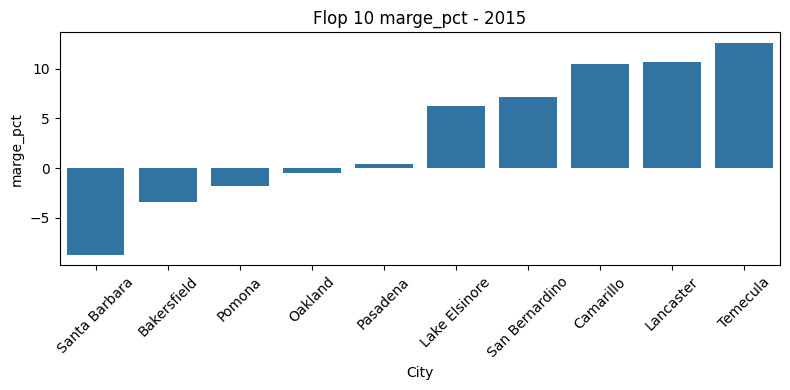

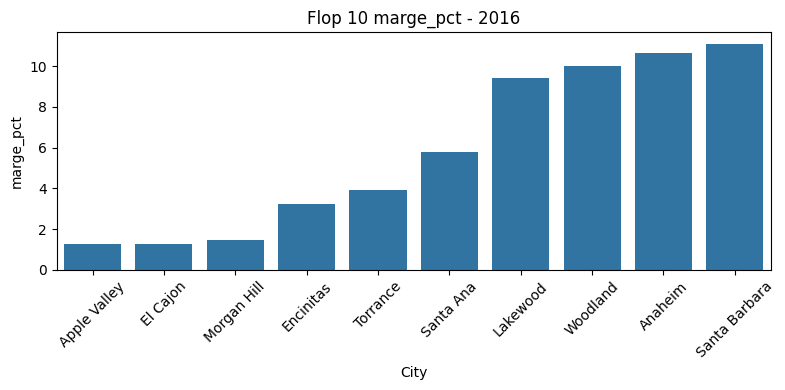

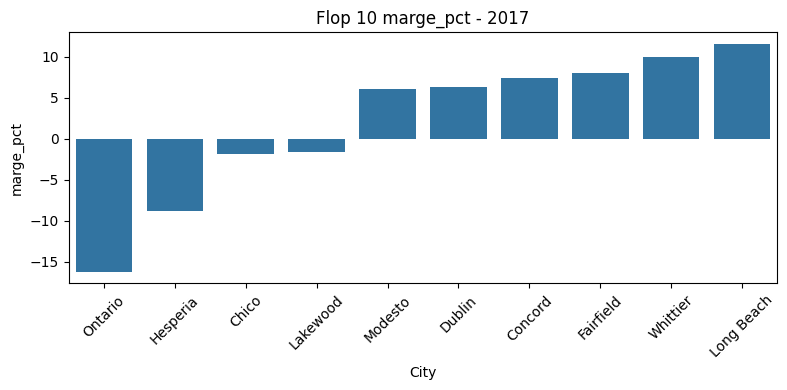

,annee,City,State,Region,CA,part_pct,prog,Marge,prog_marge,marge_pct,diff_mag,prog_mag
251,2017,Camarillo,California,West,14.73,0.00,-98.99,7.22,-95.24,49.02,0.0,0.0
186,2016,Laguna Niguel,California,West,12.96,0.00,NaN,6.35,NaN,49.00,NaN,NaN
208,2016,Oceanside,California,West,12.90,0.00,-93.70,6.32,-88.12,48.99,0.0,0.0
225,2017,Manteca,California,West,314.55,0.06,128.55,150.98,610.49,48.00,0.0,0.0
192,2016,Antioch,California,West,19.44,0.01,NaN,9.33,NaN,47.99,NaN,NaN
189,2016,Davis,California,West,32.40,0.01,NaN,15.55,NaN,47.99,NaN,NaN
126,2015,Roseville,California,West,21.92,0.01,174.69,10.50,407.25,47.90,0.0,0.0
184,2016,San Clemente,California,West,90.06,0.02,NaN,42.54,NaN,47.24,NaN,NaN
103,2014,Chula Vista,California,West,182.94,0.06,NaN,85.98,NaN,47.00,NaN,NaN
218,2017,San Mateo,California,West,75.18,0.02,NaN,35.33,NaN,46.99,NaN,NaN


,annee,City,State,Region,CA,part_pct,prog,Marge,prog_marge,marge_pct,diff_mag,prog_mag
227,2017,Ontario,California,West,283.92,0.06,NaN,-46.14,NaN,-16.25,NaN,NaN
90,2014,Pasadena,California,West,465.49,0.16,NaN,-56.74,NaN,-12.19,NaN,NaN
235,2017,Hesperia,California,West,436.70,0.09,-43.76,-38.21,-127.94,-8.75,0.0,0.0
135,2015,Santa Barbara,California,West,402.15,0.14,NaN,-35.03,NaN,-8.71,NaN,NaN
123,2015,Bakersfield,California,West,214.62,0.08,NaN,-7.33,NaN,-3.42,NaN,NaN
230,2017,Chico,California,West,753.11,0.15,-41.94,-14.04,-106.41,-1.86,0.0,0.0
142,2015,Pomona,California,West,942.35,0.34,693.69,-17.34,-139.42,-1.84,0.0,0.0
249,2017,Lakewood,California,West,962.65,0.19,273.84,-15.65,-164.56,-1.63,0.0,0.0
149,2015,Oakland,California,West,1273.67,0.45,604.89,-6.41,-110.33,-0.50,0.0,0.0
125,2015,Pasadena,California,West,842.28,0.30,80.94,3.12,-105.50,0.37,0.0,0.0


In [70]:
def Top_Flop(df: pd.DataFrame, col: str, n: int = 10, ascending: bool = False) -> pd.DataFrame:
    data_sub=(
        df.sort_values(by=col, ascending=ascending)
        .groupby('annee')
        .head(n)

    )
    years = sorted(data_sub["annee"].unique())
    for year in years:
        plt.figure(figsize=(8,4))
        subset = data_sub[data_sub["annee"] == year]
        sns.barplot(data=subset, x="City", y=col)
        plt.title(f"{'Top' if not ascending else 'Flop'} {n} {col} - {year}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    return data_sub


top5 = Top_Flop(data_city, "CA", ascending=False)
flop5 =Top_Flop(data_city, "CA", ascending=True)

top5 = Top_Flop(data_city, "prog", ascending=False)
flop5 =Top_Flop(data_city, "prog", ascending=True)

top5_marge = Top_Flop(data_city, "marge_pct", ascending=False)
flop5_marge =Top_Flop(data_city, "marge_pct", ascending=True)
display(top5_marge)
display(flop5_marge)

CA vs % Marge (dernière année)

In [71]:
last_year = int(data_city["annee"].max())

df_last = (
    data_city
    .query("State == 'California' and annee == @last_year and City.notnull()")
    [["City", "CA", "marge_pct", "prog"]]
    .sort_values("CA", ascending=False)
)

display(df_last.head(5))
display(df_last.tail(5))


,City,CA,marge_pct,prog
263,Los Angeles,48875.69,20.58,-13.34
237,San Francisco,37197.55,17.79,24.63
209,San Diego,5635.55,13.49,-69.24
226,Sacramento,5325.88,36.40,1275.88
238,Brentwood,4229.93,23.30,5194.03


,City,CA,marge_pct,prog
224,Lancaster,17.46,33.73,-82.57
259,Roseville,17.31,29.98,-97.48
251,Camarillo,14.73,49.02,-98.99
246,Santa Clara,10.56,44.98,-86.77
248,Riverside,7.80,27.05,-99.34


Évolution du CA pour les top villes

In [66]:
N = 5
top_cities = (
    df_last.sort_values(by="CA", ascending=False)
    .head(N)["City"]
    .tolist()
)

df_top_cities = (
    data_city
    .query("State == 'California' and City in @top_cities")
    .sort_values(by="CA",ascending=False)
   .pivot_table(index="annee", columns="City", values=["prog","CA"])
)

df_top_cities


CA                                                     prog  \
City  Brentwood Los Angeles Sacramento San Diego San Francisco Brentwood   
annee                                                                      
2014     780.29    28882.70    1524.63   9181.05      30983.51       NaN   
2015      79.90    41694.20      73.67  14383.43      14642.16    -89.76   
2016        NaN    56398.75     387.09  18321.00      29845.87       NaN   
2017    4229.93    48875.69    5325.88   5635.55      37197.55   5194.03   

                                                      
City  Los Angeles Sacramento San Diego San Francisco  
annee                                                 
2014          NaN        NaN       NaN           NaN  
2015        44.36     -95.17     56.66        -52.74  
2016        35.27     425.44     27.38        103.84  
2017       -13.34    1275.88    -69.24         24.63